In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, Dropout, LSTM 
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import precision_score , recall_score , confusion_matrix, classification_report, accuracy_score ,f1_score 

In [80]:
df=pd.read_csv("/content/Heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [81]:
x=df.drop(["DEATH_EVENT"],axis=1)
y=df['DEATH_EVENT']

In [82]:
from numpy.lib.shape_base import column_stack
col_names=list(x.columns)
s_scaler =preprocessing.StandardScaler()
x_df=s_scaler.fit_transform(x)
x_df=pd.DataFrame(x_df,columns=col_names)
x_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192051,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491309,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350371,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912148,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350371,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.25,random_state=7)

In [84]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=12))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [86]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
7/7 [==============================] - 1s 3ms/step - loss: 0.7123 - accuracy: 0.4107
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5223
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5938
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6473
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6741
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6633 - accuracy: 0.7098
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6567 - accuracy: 0.7321
Epoch 8/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.7455
Epoch 9/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6433 - accuracy: 0.7545
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.7634
Epoch 11/200
7/7 [===========

In [87]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

In [91]:
y_test

268    0
240    0
278    0
176    0
202    0
      ..
24     1
62     0
249    0
90     0
50     1
Name: DEATH_EVENT, Length: 75, dtype: int64

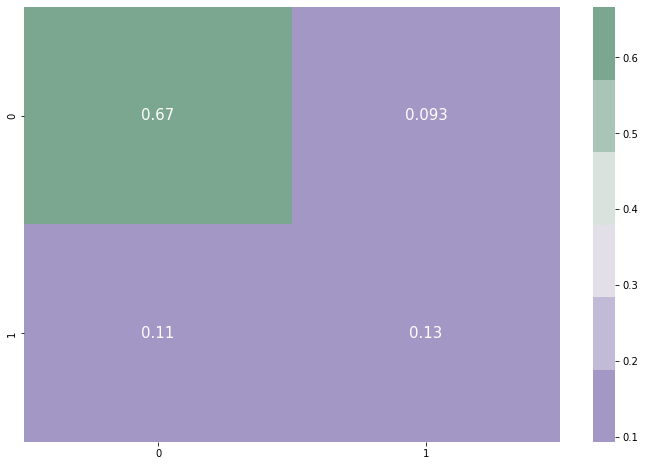

In [92]:
cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})